## Time-Series and Correlations using Python

I've recently created an account with IEX Cloud, a financial data service. As I've been learning the features of this new data source (new to me) and experimenting within my Jupyter Notebook, I thought the below may be helpful for others as well.  Therefore, I'm creating my first Medium article and will focus it on financial time series data. 

There are quite a few articles and sources on defining correlation, and the differences between correlation and causation; so what you will find below will primarily show some ways to test correlation and what the results mean.

If you're following this and coding it yourself, go to https://iexcloud.io/ and get yourself an API key!  You'll need it next!  Also, don't forgot to install an IEX Python library: https://addisonlynch.github.io/iexfinance/.  Install this library using:

**$ pip3 install iexfinance**

In [1]:
import config
import os

#os.environ['IEX_API_VERSION'] = "iexcloud-sandbox"
os.environ['IEX_TOKEN'] = config.iex_api_key  # Replace "config.iex_api_key" with your API Key from IEX Cloud!

The code below will load some python libraries we'll need. Also, set the timeframe of the series we wish to fetch.  Next, download data for the Apple stock (ticker: AAPL).  

In [2]:
from datetime import datetime
from iexfinance.stocks import get_historical_data
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime(2017, 1, 1)
end = datetime(2019, 11, 22)

In [3]:
AAPL = get_historical_data("AAPL", start, end, output_format='pandas')

We'll arbitrarily choose 'close' for the sake of simplicity and this experiment.  From this API data response, you could also choose Open, High, Low, and Volume.  

C:\Users\billv\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


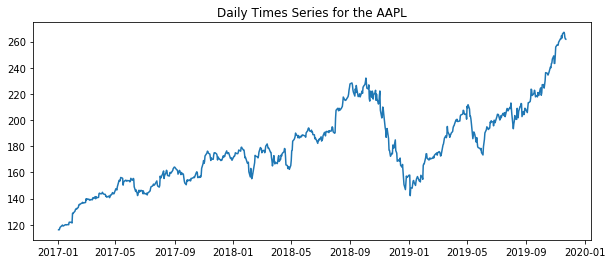

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(AAPL.index, AAPL['close'])  
plt.title('Daily Times Series for the AAPL');

Now, let's make an API call and download more data, 'SPDR S&P 500 Trust ETF,' which tracks the S&P 500 (ticker: SPY).

In [5]:
SPY = get_historical_data("SPY", start, end, output_format='pandas')

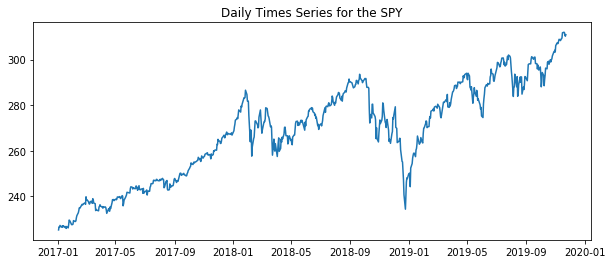

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(SPY.index, SPY['close'])
plt.title('Daily Times Series for the SPY');

Now that we have data for both Apple and the S&P 500, and we've plotted these so that we know what they look like, let's try an experiment!  We're going to try a Pearson Correlation test, to test correlation on Apple and the S&P 500.  What do you think?  Will they correlate?  Correlation will show when the Pearson Correlation Coefficient is between -1 and +1.  If closer to +1, we're seeing a positive correlation.  If Pearson's correlation is closer to -1, a negative correlation.

In [423]:
from scipy.stats import pearsonr
import scipy.stats as stats

c, p = stats.pearsonr(AAPL.dropna()['close'], SPY.dropna()['close'])
print(f"Pearson Correlation: {c}")
print(f"P-value: {p}")

Pearson Correlation: 0.9176098570966427
P-value: 1.6302772086577116e-293


A **positive** correlation between AAPL and SPY!  

Now, let's continue to explore the API.  We'll get the time series of the remainder of the FAANG stocks (Facebook, Amazon, Netflix, and Google), as well as add an interest of mine, Tesla.  

In [488]:
FANGT = get_historical_data(["FB","AMZN","NFLX","GOOG","TSLA"], start, end, output_format='pandas')
print(FANGT.head())

                FB                                      AMZN                  \
              open    high     low   close    volume    open    high     low   
date                                                                           
2017-01-03  116.03  117.84  115.51  116.86  20663912  757.92  758.76  747.70   
2017-01-04  117.55  119.66  117.29  118.69  19630932  758.39  759.68  754.20   
2017-01-05  118.86  120.95  118.32  120.67  19492150  761.55  782.40  760.26   
2017-01-06  120.98  123.88  120.03  123.41  28545263  782.36  799.44  778.48   
2017-01-09  123.55  125.43  123.04  124.90  22880360  798.00  801.77  791.77   

                             ...    GOOG                                   \
             close   volume  ...    open    high     low   close   volume   
date                         ...                                            
2017-01-03  753.67  3521066  ...  778.81  789.63  775.80  786.14  1657268   
2017-01-04  757.18  2510526  ...  788.36  791.34  7

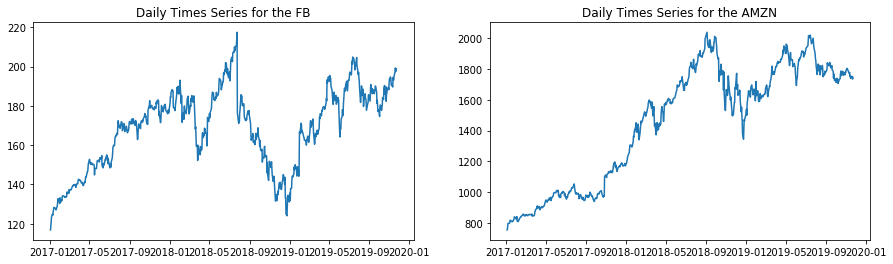

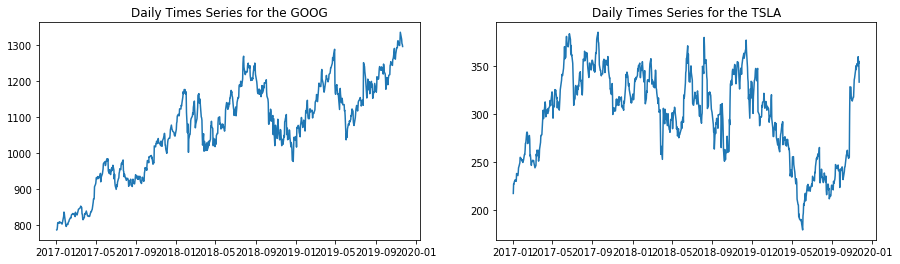

In [297]:
plt.figure(figsize=(15, 4))
#FB
plt.subplot(1, 2, 1)
plt.plot(FANGT.index, FANGT['FB']['close'])
plt.title('Daily Times Series for the FB')

#AMZN
plt.subplot(1, 2, 2)
plt.plot(FANGT.index, FANGT['AMZN']['close'])
plt.title('Daily Times Series for the AMZN');


plt.figure(figsize=(15, 4))
#GOOG
plt.subplot(1, 2, 1)
plt.plot(FANGT.index, FANGT['GOOG']['close'])
plt.title('Daily Times Series for the GOOG');

#TSLA
plt.subplot(1, 2, 2)
plt.plot(FANGT.index, FANGT['TSLA']['close'])
plt.title('Daily Times Series for the TSLA');

In [535]:
import pandas as pd

# Slice this up to make it easier to work with.
indx = pd.IndexSlice
df1 = FANGT.loc[:, (indx[:],'close')]

c = stats.pearsonr(df1['FB'].dropna()['close'], SPY.dropna()['close'])
print(f"FB vs SPY Pearson Correlation: {c}\n")

c = stats.pearsonr(df1['AMZN'].dropna()['close'], SPY.dropna()['close'])
print(f"AMZN vs SPY Pearson Correlation: {c}\n")

c = stats.pearsonr(df1['GOOG'].dropna()['close'], SPY.dropna()['close'])
print(f"GOOG vs SPY Pearson Correlation: {c}\n")

c = stats.pearsonr(df1['TSLA'].dropna()['close'], SPY.dropna()['close'])
print(f"TSLA vs SPY Pearson Correlation: {c}")  

FB vs SPY Pearson Correlation: (0.7325442525842248, 1.4911155071170679e-123)

AMZN vs SPY Pearson Correlation: (0.910899729798812, 1.0530069235474232e-281)

GOOG vs SPY Pearson Correlation: (0.9485878709468345, 0.0)

TSLA vs SPY Pearson Correlation: (-0.26968006350226387, 1.296567623576499e-13)


Google (GOOG) has the highest Pearson Correlation Coefficient out of all of these options. This might mean something like, if you're forecasting the S&P 500, you may also want to try forecasting Google.  Also, Tesla (TSLA) has negative correlation to the S&P 500. Many of these you could find by looking in the charts above and comparing the charts with the S&P 500 chart; but now you have a quantitative approach for correlation!

Now, to explore the API a bit more, let's see how the **social sentiment** feature looks.  We'll take a look at yesterday (11/22/2019), for Tesla. 

In [222]:
from iexfinance.altdata import  get_social_sentiment, get_ceo_compensation

period='minute'
specDay="20191122"

TSLA_Sent = get_social_sentiment("TSLA", period, specDay, output_format='pandas')
print(TSLA_Sent.head())

  minute  negative  positive  sentiment  totalScores
0   0000      0.12      0.88   0.084958           26
1   0001      0.12      0.88   0.160624           17
2   0002      0.11      0.89   0.061056           18
3   0003      0.29      0.71  -0.180071           17
4   0004      0.07      0.93   0.066293           15


For yesterday, what was the highest score for the most positive, and most negative, social sentiment of Tesla?

In [230]:
#print(datetime(TSLA_Sent['minute']))

TSLA_Sent_Pos = TSLA_Sent['sentiment'].max()
TSLA_Sent_Neg = TSLA_Sent['sentiment'].min()

print("Highest Social Sentiment on 11/22/2019:", TSLA_Sent_Pos)
print("Lowest Social Sentiment on 11/22/2019:", TSLA_Sent_Neg)

Highest Social Sentiment on 11/22/2019: 0.9785
Lowest Social Sentiment on 11/22/2019: -0.9487


This API also has CEO information!  Let's take a look at CEO information for Apple and Tesla.

In [217]:
AAPL_CEO = get_ceo_compensation("AAPL")
TSLA_CEO = get_ceo_compensation("TSLA")

In [534]:
import pprint

pprint.pprint(AAPL_CEO)
pprint.pprint(TSLA_CEO)

{'bonus': 0,
 'companyName': 'Apple Inc.',
 'location': 'Cupertino, CA',
 'name': 'Timothy Cook',
 'nonEquityIncentives': 12000000,
 'optionAwards': 0,
 'otherComp': 682219,
 'pensionAndDeferred': 0,
 'salary': 3000000,
 'stockAwards': 0,
 'symbol': 'AAPL',
 'total': 15682219,
 'year': '2018'}
{'bonus': 0,
 'companyName': 'Tesla Inc',
 'location': 'Palo Alto, CA',
 'name': 'Elon Musk',
 'nonEquityIncentives': 0,
 'optionAwards': 2283988504,
 'otherComp': 0,
 'pensionAndDeferred': 0,
 'salary': 56380,
 'stockAwards': 0,
 'symbol': 'TSLA',
 'total': 2284044884,
 'year': '2018'}


There's a lot more to explore and analyze.  In the next article, I plan to explore the more "real-time" data of IEX Cloud, such as bid-ask and spreads.  Also, may continue on with time-series analysis and move on to some basic forecasting. I hope you found this article useful!  Find me over at http://www.vantages.ai